In [56]:
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file(
'sentimental-big-query-gf9j-0e4496f17e95.json')

project_id = 'sentimental-big-query-gf9j'
client = bigquery.Client(credentials= credentials,project=project_id)

query = """
    select * from `sentiment.sentiment_tb` 
"""
results = client.query(query)

for row in results:
    title = row['user_id']
    unique_words = row['message']
    print(f'{title:<20} | {unique_words}')

Ankit                | i am very positive
user2                | set an appointment for 2pm on friday
user2                | set an appointment for 4pm on Thursday
user2                | set an appointment for 3pm tomorrow but your work is not good at all.


In [57]:
lis1=[]
for row in results:
    msg = row['message']
    lis1.append(msg)
    

In [58]:
print(len(lis1))

4


In [24]:
from google.cloud import automl
project_id = "sentimental-big-query-gf9j"
model_id = "TST5499002897158897664"
content = "this is ok"

import sys
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="sentimental-big-query-gf9j-3fb625330594.json"


In [59]:
prediction_client = automl.PredictionServiceClient()

# Get the full path of the model.
model_full_id = prediction_client.model_path(
    project_id, "us-central1", model_id
)
model_full_id="projects/98715506514/locations/us-central1/models/TST5499002897158897664"
print(model_full_id)



# Supported mime_types: 'text/plain', 'text/html'
# https://cloud.google.com/automl/docs/reference/rpc/google.cloud.automl.v1#textsnippet
lis2=[]
for msg in lis1:
    content = msg
    text_snippet = automl.types.TextSnippet(
    content=content, mime_type="text/plain"
    )
    payload = automl.types.ExamplePayload(text_snippet=text_snippet)
    response = prediction_client.predict(model_full_id, payload)
    res=response.payload[0].text_sentiment.sentiment
    if(res==2 or res==1):
        lis2.append(res)
    else:
        lis2.append(0)



projects/98715506514/locations/us-central1/models/TST5499002897158897664


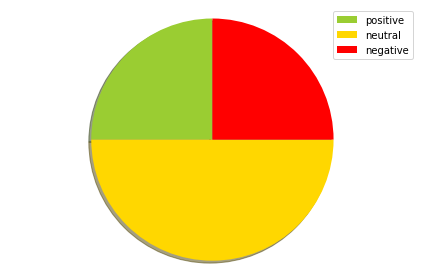

In [67]:
pos=lis2.count(2)
neu=lis2.count(1)
neg=lis2.count(0)

import matplotlib.pyplot as plt

labels = ['positive', 'neutral', 'negative']
sizes = [pos,neu,neg]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()